**IMPORTING LIBRARIES AND DATA**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer

In [ ]:
merged=pd.read_csv("/content/merged.csv")
merged=merged[['tweet']]
merged.head(5)

,tweet
0,Interesting interview about Russia's position ...
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...
3,"stephenpoxon lidiya1407 No, a lot of people ..."
4,The “special operation in Ukraine”! Better na...


In [ ]:
merged

,tweet
0,Interesting interview about Russia's position ...
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...
3,"stephenpoxon lidiya1407 No, a lot of people ..."
4,The “special operation in Ukraine”! Better na...
...,...
17108,Its not only a major loss for Russia and Ukrai...
17109,Terrible for the Russian economy
17110,It's a stupid war disrupting the peace of huma...
17111,A suffering for many.


In [ ]:
dataset=pd.read_csv("/content/russiawar.csv")
dataset=dataset[['text']]
dataset=dataset.rename(columns={'text': 'tweet'})
dataset

,tweet
0,RT @EuromaidanPR: Just in: The 13-kilometer ru...
1,RT @EuromaidanPR: A car with a family shot was...
2,RT @EuromaidanPR: Just in: The 13-kilometer ru...
3,RT @Cyberspec1: #RussiaUkraine #Greece \nGreek...
4,RT @Thomasthailer: Anyone who is supplying the...
...,...
3995,RT @NuestraIraSLG: #20a—#MARIUPOL/#Ukraine|ian...
3996,RT @EmmettLesterSan: Ukraine patrol finds a do...
3997,"RT @Rob42021939: @laurenboebert 🖕\n424-8, Hous..."
3998,RT @EuromaidanPR: #своихбросаем “Russians do a...


In [ ]:
dataset1=pd.read_csv("/content/russia1.csv")
dataset1=dataset1[['text']]
dataset1=dataset1.rename(columns={'text': 'tweet'})
dataset1

,tweet
0,RT @MeshDispatch: // Fresh graves of Russian a...
1,Ukraine warned of a bleak outlook as Mariupol ...
2,#Russia is beefing up its forces for a new ass...
3,RT @nexta_tv: #Ukrainian intelligence reports ...
4,RT @Blue_Sauron: Drone footage date a couple o...
...,...
7995,RT @lesiavasylenko: 16 y.o. Karina raped by #R...
7996,Russia says more than a thousand Ukrainian mar...
7997,RT @TeesriJungNews: #KHERSON : #Russia|n force...
7998,Ukraine war: Putin ally 'prince of darkness' V...


In [ ]:
merged=merged.append(dataset)
merged=merged.append(dataset1)

In [ ]:
merged.shape

(29113, 1)

In [ ]:
merged.head()

,tweet
0,Interesting interview about Russia's position ...
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...
3,"stephenpoxon lidiya1407 No, a lot of people ..."
4,The “special operation in Ukraine”! Better na...


**DATA CLEANING**

In [ ]:
def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [ ]:
merged['removed_punc'] = merged['tweet'].apply(lambda x: remove_punct(str(x)))
merged.head()

,tweet,removed_punc
0,Interesting interview about Russia's position ...,Interesting interview about Russias position i...
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...,RWTrollPatrol JimJordan 🤣🤣🤣🤣 The ones that wil...
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...,mfarussia RusEmbUSA RussianEmbassy RusEmbI...
3,"stephenpoxon lidiya1407 No, a lot of people ...",stephenpoxon lidiya1407 No a lot of people f...
4,The “special operation in Ukraine”! Better na...,The “special operation in Ukraine” Better nam...


In [ ]:
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [ ]:
merged['tokens'] = merged['removed_punc'].apply(lambda msg : tokenize(msg))
merged.head()

,tweet,removed_punc,tokens
0,Interesting interview about Russia's position ...,Interesting interview about Russias position i...,"[interesting, interview, about, russias, posit..."
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...,RWTrollPatrol JimJordan 🤣🤣🤣🤣 The ones that wil...,"[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, the, ones, th..."
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...,mfarussia RusEmbUSA RussianEmbassy RusEmbI...,"[, mfarussia, rusembusa, russianembassy, rusem..."
3,"stephenpoxon lidiya1407 No, a lot of people ...",stephenpoxon lidiya1407 No a lot of people f...,"[, stephenpoxon, lidiya1407, no, a, lot, of, p..."
4,The “special operation in Ukraine”! Better na...,The “special operation in Ukraine” Better nam...,"[the, “special, operation, in, ukraine”, bette..."


In [ ]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [ ]:
merged['larger_tokens'] = merged['tokens'].apply(lambda x : remove_small_words(x))
merged.head()

,tweet,removed_punc,tokens,larger_tokens
0,Interesting interview about Russia's position ...,Interesting interview about Russias position i...,"[interesting, interview, about, russias, posit...","[interesting, interview, about, russias, posit..."
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...,RWTrollPatrol JimJordan 🤣🤣🤣🤣 The ones that wil...,"[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, the, ones, th...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, that, w..."
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...,mfarussia RusEmbUSA RussianEmbassy RusEmbI...,"[, mfarussia, rusembusa, russianembassy, rusem...","[mfarussia, rusembusa, russianembassy, rusembi..."
3,"stephenpoxon lidiya1407 No, a lot of people ...",stephenpoxon lidiya1407 No a lot of people f...,"[, stephenpoxon, lidiya1407, no, a, lot, of, p...","[stephenpoxon, lidiya1407, people, feel, this,..."
4,The “special operation in Ukraine”! Better na...,The “special operation in Ukraine” Better nam...,"[the, “special, operation, in, ukraine”, bette...","[“special, operation, ukraine”, better, name, ..."


In [ ]:
import nltk
nltk.download('stopwords')
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
merged['clean_tokens'] = merged['larger_tokens'].apply(lambda x : remove_stopwords(x))
merged.head()

,tweet,removed_punc,tokens,larger_tokens,clean_tokens
0,Interesting interview about Russia's position ...,Interesting interview about Russias position i...,"[interesting, interview, about, russias, posit...","[interesting, interview, about, russias, posit...","[interesting, interview, russias, position, wo..."
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...,RWTrollPatrol JimJordan 🤣🤣🤣🤣 The ones that wil...,"[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, the, ones, th...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, that, w...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, tried, ..."
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...,mfarussia RusEmbUSA RussianEmbassy RusEmbI...,"[, mfarussia, rusembusa, russianembassy, rusem...","[mfarussia, rusembusa, russianembassy, rusembi...","[mfarussia, rusembusa, russianembassy, rusembi..."
3,"stephenpoxon lidiya1407 No, a lot of people ...",stephenpoxon lidiya1407 No a lot of people f...,"[, stephenpoxon, lidiya1407, no, a, lot, of, p...","[stephenpoxon, lidiya1407, people, feel, this,...","[stephenpoxon, lidiya1407, people, feel, proxy..."
4,The “special operation in Ukraine”! Better na...,The “special operation in Ukraine” Better nam...,"[the, “special, operation, in, ukraine”, bette...","[“special, operation, ukraine”, better, name, ...","[“special, operation, ukraine”, better, name, ..."


In [ ]:
nltk.download('wordnet')
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
merged['lemma_words'] = merged['clean_tokens'].apply(lambda x : lemmatize(x))
merged.head()

,tweet,removed_punc,tokens,larger_tokens,clean_tokens,lemma_words
0,Interesting interview about Russia's position ...,Interesting interview about Russias position i...,"[interesting, interview, about, russias, posit...","[interesting, interview, about, russias, posit...","[interesting, interview, russias, position, wo...","[interesting, interview, russia, position, wor..."
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...,RWTrollPatrol JimJordan 🤣🤣🤣🤣 The ones that wil...,"[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, the, ones, th...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, that, w...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, tried, ...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, one, tried, t..."
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...,mfarussia RusEmbUSA RussianEmbassy RusEmbI...,"[, mfarussia, rusembusa, russianembassy, rusem...","[mfarussia, rusembusa, russianembassy, rusembi...","[mfarussia, rusembusa, russianembassy, rusembi...","[mfarussia, rusembusa, russianembassy, rusembi..."
3,"stephenpoxon lidiya1407 No, a lot of people ...",stephenpoxon lidiya1407 No a lot of people f...,"[, stephenpoxon, lidiya1407, no, a, lot, of, p...","[stephenpoxon, lidiya1407, people, feel, this,...","[stephenpoxon, lidiya1407, people, feel, proxy...","[stephenpoxon, lidiya1407, people, feel, proxy..."
4,The “special operation in Ukraine”! Better na...,The “special operation in Ukraine” Better nam...,"[the, “special, operation, in, ukraine”, bette...","[“special, operation, ukraine”, better, name, ...","[“special, operation, ukraine”, better, name, ...","[“special, operation, ukraine”, better, name, ..."


In [ ]:
# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [ ]:
merged['clean_text'] = merged['lemma_words'].apply(lambda x : return_sentences(x))
merged.head()

,tweet,removed_punc,tokens,larger_tokens,clean_tokens,lemma_words,clean_text
0,Interesting interview about Russia's position ...,Interesting interview about Russias position i...,"[interesting, interview, about, russias, posit...","[interesting, interview, about, russias, posit...","[interesting, interview, russias, position, wo...","[interesting, interview, russia, position, wor...",interesting interview russia position world qu...
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...,RWTrollPatrol JimJordan 🤣🤣🤣🤣 The ones that wil...,"[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, the, ones, th...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, that, w...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, tried, ...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, one, tried, t...",rwtrollpatrol jimjordan 🤣🤣🤣🤣 one tried treason...
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...,mfarussia RusEmbUSA RussianEmbassy RusEmbI...,"[, mfarussia, rusembusa, russianembassy, rusem...","[mfarussia, rusembusa, russianembassy, rusembi...","[mfarussia, rusembusa, russianembassy, rusembi...","[mfarussia, rusembusa, russianembassy, rusembi...",mfarussia rusembusa russianembassy rusembindia...
3,"stephenpoxon lidiya1407 No, a lot of people ...",stephenpoxon lidiya1407 No a lot of people f...,"[, stephenpoxon, lidiya1407, no, a, lot, of, p...","[stephenpoxon, lidiya1407, people, feel, this,...","[stephenpoxon, lidiya1407, people, feel, proxy...","[stephenpoxon, lidiya1407, people, feel, proxy...",stephenpoxon lidiya1407 people feel proxy russ...
4,The “special operation in Ukraine”! Better na...,The “special operation in Ukraine” Better nam...,"[the, “special, operation, in, ukraine”, bette...","[“special, operation, ukraine”, better, name, ...","[“special, operation, ukraine”, better, name, ...","[“special, operation, ukraine”, better, name, ...",“special operation ukraine” better name “war” ...


In [ ]:
import re

def remove_url(text):
  url=re.compile(r"https?://\S+|www\.\S+")
  return url.sub(r"", text)

def remove_html(text):
  html= re.compile(r"<.*?")
  return html.sub(r"", text)

def remove_emojis(string):
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', string) # no emoji

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')
  

In [ ]:
i=0
for x in merged['clean_text']:
  y= remove_url(x)
  z= remove_html(y)
  s= deEmojify(z)
  merged.iloc[i, -1]= s
  i+=1

In [ ]:
merged.head()

,tweet,removed_punc,tokens,larger_tokens,clean_tokens,lemma_words,clean_text
0,Interesting interview about Russia's position ...,Interesting interview about Russias position i...,"[interesting, interview, about, russias, posit...","[interesting, interview, about, russias, posit...","[interesting, interview, russias, position, wo...","[interesting, interview, russia, position, wor...",interesting interview russia position world qu...
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...,RWTrollPatrol JimJordan 🤣🤣🤣🤣 The ones that wil...,"[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, the, ones, th...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, that, w...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, tried, ...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, one, tried, t...",rwtrollpatrol jimjordan one tried treason one...
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...,mfarussia RusEmbUSA RussianEmbassy RusEmbI...,"[, mfarussia, rusembusa, russianembassy, rusem...","[mfarussia, rusembusa, russianembassy, rusembi...","[mfarussia, rusembusa, russianembassy, rusembi...","[mfarussia, rusembusa, russianembassy, rusembi...",mfarussia rusembusa russianembassy rusembindia...
3,"stephenpoxon lidiya1407 No, a lot of people ...",stephenpoxon lidiya1407 No a lot of people f...,"[, stephenpoxon, lidiya1407, no, a, lot, of, p...","[stephenpoxon, lidiya1407, people, feel, this,...","[stephenpoxon, lidiya1407, people, feel, proxy...","[stephenpoxon, lidiya1407, people, feel, proxy...",stephenpoxon lidiya1407 people feel proxy russ...
4,The “special operation in Ukraine”! Better na...,The “special operation in Ukraine” Better nam...,"[the, “special, operation, in, ukraine”, bette...","[“special, operation, ukraine”, better, name, ...","[“special, operation, ukraine”, better, name, ...","[“special, operation, ukraine”, better, name, ...",special operation ukraine better name war pref...


**PART A: (POSITIVE NEGATIVE NEUTRAL)**

In [ ]:
#install vaderSentimentlibrary
!pip install vaderSentiment

#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
result=[]

def sentiment_vader(text):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(text)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    return overall_sentiment
for tweet in merged['clean_text']:
  #calculate the negative, positive, neutral and compound scores, plus verbal evaluation
  res=sentiment_vader(tweet)
  result.append(res)

In [ ]:
merged['result']=result
merged.head(5)

,tweet,removed_punc,tokens,larger_tokens,clean_tokens,lemma_words,clean_text,result
0,Interesting interview about Russia's position ...,Interesting interview about Russias position i...,"[interesting, interview, about, russias, posit...","[interesting, interview, about, russias, posit...","[interesting, interview, russias, position, wo...","[interesting, interview, russia, position, wor...",interesting interview russia position world qu...,Negative
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...,RWTrollPatrol JimJordan 🤣🤣🤣🤣 The ones that wil...,"[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, the, ones, th...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, that, w...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, tried, ...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, one, tried, t...",rwtrollpatrol jimjordan one tried treason one...,Negative
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...,mfarussia RusEmbUSA RussianEmbassy RusEmbI...,"[, mfarussia, rusembusa, russianembassy, rusem...","[mfarussia, rusembusa, russianembassy, rusembi...","[mfarussia, rusembusa, russianembassy, rusembi...","[mfarussia, rusembusa, russianembassy, rusembi...",mfarussia rusembusa russianembassy rusembindia...,Positive
3,"stephenpoxon lidiya1407 No, a lot of people ...",stephenpoxon lidiya1407 No a lot of people f...,"[, stephenpoxon, lidiya1407, no, a, lot, of, p...","[stephenpoxon, lidiya1407, people, feel, this,...","[stephenpoxon, lidiya1407, people, feel, proxy...","[stephenpoxon, lidiya1407, people, feel, proxy...",stephenpoxon lidiya1407 people feel proxy russ...,Positive
4,The “special operation in Ukraine”! Better na...,The “special operation in Ukraine” Better nam...,"[the, “special, operation, in, ukraine”, bette...","[“special, operation, ukraine”, better, name, ...","[“special, operation, ukraine”, better, name, ...","[“special, operation, ukraine”, better, name, ...",special operation ukraine better name war pref...,Negative


In [ ]:
y=[]
sub1="Positive"
sub2="Negative"
for i in merged['result']:
  if sub1 in i:
    y.append(1)
  elif sub2 in i:
    y.append(2)
  else:
    y.append(0)
merged['y']=y
merged.head(20)

,tweet,removed_punc,tokens,larger_tokens,clean_tokens,lemma_words,clean_text,result,y
0,Interesting interview about Russia's position ...,Interesting interview about Russias position i...,"[interesting, interview, about, russias, posit...","[interesting, interview, about, russias, posit...","[interesting, interview, russias, position, wo...","[interesting, interview, russia, position, wor...",interesting interview russia position world qu...,Negative,2
1,RWTrollPatrol Jim_Jordan 🤣🤣🤣🤣 The ones that wi...,RWTrollPatrol JimJordan 🤣🤣🤣🤣 The ones that wil...,"[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, the, ones, th...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, that, w...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, ones, tried, ...","[rwtrollpatrol, jimjordan, 🤣🤣🤣🤣, one, tried, t...",rwtrollpatrol jimjordan one tried treason one...,Negative,2
2,mfa_russia RusEmbUSA RussianEmbassy RusEmb...,mfarussia RusEmbUSA RussianEmbassy RusEmbI...,"[, mfarussia, rusembusa, russianembassy, rusem...","[mfarussia, rusembusa, russianembassy, rusembi...","[mfarussia, rusembusa, russianembassy, rusembi...","[mfarussia, rusembusa, russianembassy, rusembi...",mfarussia rusembusa russianembassy rusembindia...,Positive,1
3,"stephenpoxon lidiya1407 No, a lot of people ...",stephenpoxon lidiya1407 No a lot of people f...,"[, stephenpoxon, lidiya1407, no, a, lot, of, p...","[stephenpoxon, lidiya1407, people, feel, this,...","[stephenpoxon, lidiya1407, people, feel, proxy...","[stephenpoxon, lidiya1407, people, feel, proxy...",stephenpoxon lidiya1407 people feel proxy russ...,Positive,1
4,The “special operation in Ukraine”! Better na...,The “special operation in Ukraine” Better nam...,"[the, “special, operation, in, ukraine”, bette...","[“special, operation, ukraine”, better, name, ...","[“special, operation, ukraine”, better, name, ...","[“special, operation, ukraine”, better, name, ...",special operation ukraine better name war pref...,Negative,2
5,Ukraine will smash Russia. Give them everythin...,Ukraine will smash Russia Give them everything...,"[ukraine, will, smash, russia, give, them, eve...","[ukraine, will, smash, russia, give, them, eve...","[ukraine, smash, russia, give, everything, nee...","[ukraine, smash, russia, give, everything, nee...",ukraine smash russia give everything need driv...,Neutral,0
6,DmytroKuleba ABaerbock come on Ukraine it’s ...,DmytroKuleba ABaerbock come on Ukraine it’s ...,"[, dmytrokuleba, abaerbock, come, on, ukraine,...","[dmytrokuleba, abaerbock, come, ukraine, it’s,...","[dmytrokuleba, abaerbock, come, ukraine, it’s,...","[dmytrokuleba, abaerbock, come, ukraine, it’s,...",dmytrokuleba abaerbock come ukraine its time s...,Neutral,0
7,marcelvandenber You are a liar and warmonger:...,marcelvandenber You are a liar and warmonger ...,"[, marcelvandenber, you, are, a, liar, and, wa...","[marcelvandenber, liar, warmonger, showing, pi...","[marcelvandenber, liar, warmonger, showing, pi...","[marcelvandenber, liar, warmonger, showing, pi...",marcelvandenber liar warmonger showing pic atr...,Negative,2
8,KaminskiMK 🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬Russians are so proud of...,KaminskiMK 🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬Russians are so proud of...,"[, kaminskimk, 🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬russians, are, so, pr...","[kaminskimk, 🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬russians, proud, their,...","[kaminskimk, 🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬russians, proud, cultur...","[kaminskimk, 🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬russians, proud, cultur...",kaminskimk russians proud culture russian cult...,Positive,1
9,cerbnord Russia 12th richest country in the w...,cerbnord Russia 12th richest country in the w...,"[, cerbnord, russia, 12th, richest, country, i...","[cerbnord, russia, 12th, richest, country, wor...","[cerbnord, russia, 12th, richest, country, wor...","[cerbnord, russia, 12th, richest, country, wor...",cerbnord russia 12th richest country world peo...,Positive,1


In [ ]:
merged= merged[['clean_text','result','y']]
merged.head()

,clean_text,result,y
0,interesting interview russia position world qu...,Negative,2
1,rwtrollpatrol jimjordan one tried treason one...,Negative,2
2,mfarussia rusembusa russianembassy rusembindia...,Positive,1
3,stephenpoxon lidiya1407 people feel proxy russ...,Positive,1
4,special operation ukraine better name war pref...,Negative,2


**Named Entity Recognition**

In [ ]:
import spacy
from spacy import displacy

NER = spacy.load("en_core_web_sm")

In [ ]:
text1=[]
for i in merged['clean_text']:
  text=NER(i)
  for word in text.ents:
    print(word.text,word.label_)
  text1.append(text)


Streaming output truncated to the last 5000 lines.
isayasafewerki eritrea tigray PERSON
ethiopia GPE
tigray xijinping PERSON
china GPE
ukraine GPE
describe russias action ORG
lesiavasylenko graveyard PERSON
bucha area LOC
russia GPE
ukrainian NORP
oivshina dagestan PERSON
russia GPE
army ORG
tpyxanews izyum ORG
russian NORP
ukraine GPE
russia GPE
alexkokcharov ORG
kherson south ukraine ORG
russian NORP
lesiavasylenko least switch PERSON
russia GPE
cgmeifangzhang hyping space threat PERSON
china GPE
russia GPE
nextatv ukrainian PERSON
russia GPE
tpyxanews grandfather kharkov PERSON
backdrop house ORG
ukraine GPE
russia tpyxa GPE
lesiavasylenko finn swede PERSON
nato ORG
russia GPE
latin american NORP
antirussian NORP
chile argentina ORG
danilearussia hello pakistan ORG
russia GPE
german economic institute ORG
2022 DATE
russia GPE
russian NORP
vladimir putin PERSON
nextatv ukrainian PERSON
russia GPE
ukraine GPE
russia GPE
shall party ORG
russia GPE
kenya foreign ministry ORG
ukrainian N

In [ ]:
w=[]
g=[]
for i in text1:
  text=i
  for word in text.ents:
      if word.label_=='PERSON':
        w.append(word)
      elif word.label_=='GPE':
        g.append(word)




In [ ]:
w=str(w)
g=str(g)

In [ ]:
s=w.split()
g=g.split()


In [ ]:
freq=nltk.FreqDist(s)
freq1=nltk.FreqDist(g)

In [ ]:
print(freq.most_common(50))
print(freq1.most_common(50))

[('putin,', 1937), ('lesiavasylenko', 933), ('nextatv', 773), ('putin', 764), ('karina,', 621), ('ukrainian,', 607), ('russia,', 517), ('standwithukraine', 443), ('ukraine,', 406), ('russiaukrainewar,', 309), ('mariupol', 272), ('euromaidanpr', 254), ('russiaukrainewar', 243), ('russianembassy', 201), ('stopputin,', 194), ('nuestrairaslg', 192), ('graveyard,', 179), ('ambulyanov', 175), ('ukraine', 169), ('hitler,', 158), ('nextatv,', 154), ('stopwar,', 151), ('mykhailo', 141), ('lysenko,', 141), ('dnipro', 137), ('mfarussia,', 136), ('standwithukraine,', 134), ('lavrov,', 133), ('vladimir', 131), ('russian,', 129), ('method', 125), ('bluesauron', 118), ('artillery,', 118), ('mrls', 116), ('aalimov,', 114), ('bucha', 111), ('eritrea', 110), ('xijinping,', 109), ('isayasafewerki', 108), ('tigray,', 108), ('zelensky,', 107), ('tigray', 107), ('britain,', 106), ('borisjohnson,', 104), ('stopputin', 98), ('mfarussia', 93), ('stopwarinukraine,', 86), ('stoprussia', 85), ('stoprussianaggress

**TO FIND IF A TWEET IS RUSSIA DOMNATED OR UKRAINE DOMINATED**

In [ ]:
list1= {'Russia': ['russia', 'ussr', 'putin', 'vladimir','stoprussianaggression','ussr','ukrainevsrussia','russianarmy','genocide','soviet','russianembassy','stopwar','stopthewar','stopputin','boycottrussia','mfarussia','borisjohnson', 'russian', 'trump', 'china', 'russias', 'kiev','india']}
list2= {'Ukraine': ['ukraine','standwithukraine','stopputin','ukrainian','istandwithukraine','ukrainevsrussia','genocide','helpukraine','boycottrussia','zelensky', 'ukr', 'nato', 'hilter','borisjohnson', 'boris', 'johnson', 'trump', 'kiev','india','america','britain',]}

In [ ]:
  c1=[]
  c2=[]
  c3=[]
  dc=[]
  for text in merged['clean_text']:
      str1=text.split()
      count1 = 0
      count2 = 0
      for x in str1:
        if x in list1["Russia"]:
          count1 += 1
        elif x in list2["Ukraine"]:
          count2 += 1
      if count1>count2:
        c1.append(text)
        dc.append('Russia')
      elif count2>count1:
        c2.append(text)
        dc.append('Ukraine')
      else:
        c3.append(text)
        dc.append('Neutral')

In [ ]:
merged['Dominating Country']=dc
merged.head()

,clean_text,result,y,Dominating Country
0,interesting interview russia position world qu...,Negative,2,Russia
1,rwtrollpatrol jimjordan one tried treason one...,Negative,2,Russia
2,mfarussia rusembusa russianembassy rusembindia...,Positive,1,Russia
3,stephenpoxon lidiya1407 people feel proxy russ...,Positive,1,Ukraine
4,special operation ukraine better name war pref...,Negative,2,Neutral


In [ ]:
merged.shape

(29113, 4)

In [ ]:
for i in range(29113):
  if y[i]==2:
    if dc[i]=="Russia":
      dc[i]="Ukraine"
    elif dc[i]=="Ukraine":
      dc[i]="Russia"

In [ ]:
merged['Pro']=dc
merged.head(20)

,clean_text,result,y,Dominating Country,Pro
0,interesting interview russia position world qu...,Negative,2,Russia,Ukraine
1,rwtrollpatrol jimjordan one tried treason one...,Negative,2,Russia,Ukraine
2,mfarussia rusembusa russianembassy rusembindia...,Positive,1,Russia,Russia
3,stephenpoxon lidiya1407 people feel proxy russ...,Positive,1,Ukraine,Ukraine
4,special operation ukraine better name war pref...,Negative,2,Neutral,Neutral
5,ukraine smash russia give everything need driv...,Neutral,0,Ukraine,Ukraine
6,dmytrokuleba abaerbock come ukraine its time s...,Neutral,0,Russia,Russia
7,marcelvandenber liar warmonger showing pic atr...,Negative,2,Ukraine,Russia
8,kaminskimk russians proud culture russian cult...,Positive,1,Russia,Russia
9,cerbnord russia 12th richest country world peo...,Positive,1,Russia,Russia


In [ ]:
merged.drop(merged.index[merged['Pro'] == 'Neutral'], inplace=True)
# display the dataframe
merged.shape

(14549, 5)

In [ ]:
for i in range (29113):
  if dc[i] == "Neutral":
    df1=merged['clean_text']

In [ ]:
merged.head()

,clean_text,result,y,Dominating Country,Pro
0,interesting interview russia position world qu...,Negative,2,Russia,Ukraine
6,dmytrokuleba abaerbock come ukraine its time s...,Neutral,0,Russia,Russia
7,marcelvandenber liar warmonger showing pic atr...,Negative,2,Ukraine,Russia
11,reporting site russian asset company still tra...,Positive,1,Russia,Russia
12,imhomein2 friend who expert russia mind give c...,Positive,1,Russia,Russia


In [ ]:
from sklearn import preprocessing 
label_encoder= preprocessing.LabelEncoder()

merged['target']=label_encoder.fit_transform(merged['Pro'])

In [ ]:
merged['target'].value_counts()

1    7918
0    6631
Name: target, dtype: int64

In [ ]:
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(merged['clean_text'], merged['target'], test_size=0.33, random_state=42)
# vectorize text using TFIDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**Logistic Regression**

In [ ]:
# Create an instance and fit the model 
from sklearn.linear_model import LogisticRegression
lr_model2 = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
lr_model2.fit(X_train_tfidf, y_train)

# Making predictions
y_pred2 = lr_model2.predict(X_test_tfidf)

# Accuracy
print(f"Accuracy = {lr_model2.score(X_test_tfidf, y_test)}")

Accuracy = 0.7940441482715536


**OVERSAMPLING**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros1, y_ros1 = ros.fit_resample(X_train_tfidf, y_train)
X_ros, y_ros = ros.fit_resample(X_test_tfidf, y_test)

# check distribution after applying over sampling 
y_ros1.value_counts()

1    5333
0    5333
Name: target, dtype: int64

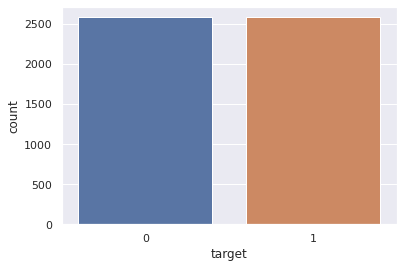

In [ ]:
sns.set_theme(style='darkgrid')
ax=sns.countplot(x=y_ros,data=merged)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_ros1, y_ros1)
print(classification_report(y_ros, rf.predict(X_ros)))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2585
           1       0.81      0.79      0.80      2585

    accuracy                           0.81      5170
   macro avg       0.81      0.81      0.81      5170
weighted avg       0.81      0.81      0.81      5170



**Confusion** **Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_ros, rf.predict(X_ros))
print(cm)

[[2117  468]
 [ 533 2052]]


Text(0.5, 257.44, 'Predicted label')

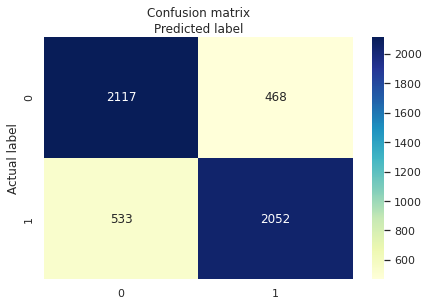

In [ ]:
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**WORDCLOUD**

In [ ]:
a=str(merged['clean_text'])
a

'0       interesting interview russia position world qu...\n6       dmytrokuleba abaerbock come ukraine its time s...\n7       marcelvandenber liar warmonger showing pic atr...\n11      reporting site russian asset company still tra...\n12      imhomein2 friend who expert russia mind give c...\n                              ...                        \n7989    martinrjay george galloway make point make art...\n7991    food gasoline price united state increased inf...\n7992    double standard refugee czechia ukrainian roma...\n7995    lesiavasylenko karina raped russia soldier sho...\n7999    could send ukraine 450ms brimstone maritime mi...\nName: clean_text, Length: 14549, dtype: object'

In [ ]:
%matplotlib inline
import numpy as np 
from PIL import Image # converting images into arrays
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

print ('All packages are imported!')

All packages are imported!


In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

In [ ]:
# generate the word cloud
wc.generate(a)

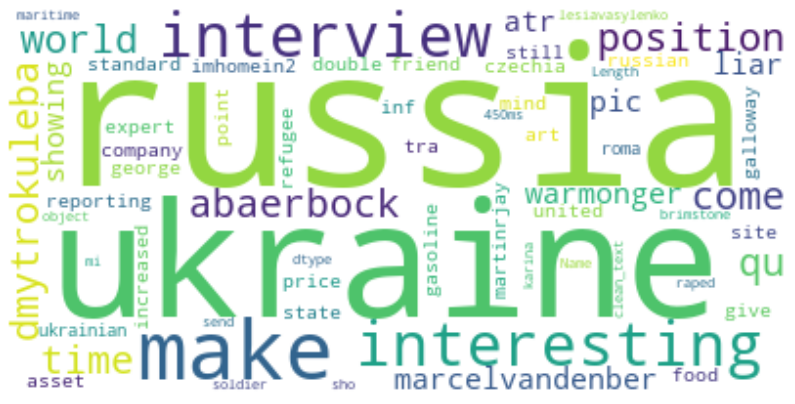

In [ ]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()